# Параллельная сортировка слиянием с использованием pthreads

Дан массив $a$ из $n$ целых чисел в случайном порядке. Нужно упорядочить массив в порядке возрастания. Алгоритм состоит из трех шагов:

• Разбить массив а на куски (чанки). 

• Отсортировать каждый чаик массива (любым алгоритмом сортировки, в нашей реализации используется qsort()). Чанки нужно сортировать параллельно (относительно друг друга). 

• Слить все чанки в один упорядоченный массив, используя параллельный алгоритм слияния. 

### Задание

Реализовать параллельную сортировку слиянием с помощью *pthreads*. Программа должна принимать иа вход целочисленные $n$, $m$, $P$, где $m$ - максимальный размер чанка, $P$ - число pthreads потоков. В файле stats.txt должно быть записано время работы сортировки и перечислены входные параметры. В первой строчке файла data.txt должен быть записан исходный массив, во второй строчке файла data.txt — отсортированный массив. 

Произвести запуск при $Р = 1, 2, 3, 4, 6, 8, 16$. Составить график зависимости $Т(Р)$, $S(Р)$, $Е(Р)$ при фиксированном значении $n$ и $m$ ($m$ нужно подобрать оптимальным для вашей вычислительной системы, то есть возьмем $m = \frac{n}{P}$). На графике $Т(Р)$ отобразить время работы qsort из stdlib.h и OpenMP реализации параллельной сортировки слиянием.

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


P_values = [1, 2, 3, 4, 6, 8, 16]
N_values = [100, 1000, 5000, 10000, 30000, 100000, 200000, 500000, 1000000, 1500000, 2000000, 2500000, 3000000]
get_new_data = "YES"  # "YES" if you want to generate new stats

In [2]:
if get_new_data == "YES":
    subprocess.call("rm stats*.txt", shell=True)
    print("Old stats are deleted! Starting generation of new stats...")
    print("Generating stats for pthreads...")
    for P in P_values:
        print("Stats for {} threads:".format(P), end=" ")
        for N in N_values:
            if P == 1:
                subprocess.call(list(map(str ,["./single_thread", N, "stats{}.txt".format(P)])))
            else:
                T = N // P
                subprocess.call(list(map(str ,["./multi_threads", N, T, P, "stats{}.txt".format(P)])))
            print("N={}".format(N), end=" ")
        print()
    print("Generating stats for open_mp:")
    for P in P_values[1:]:
        print("Stats for {} threads:".format(P), end=" ")
        for N in N_values:
            T = N // P
            subprocess.call(list(map(str ,["./multi_threads_openmp", N, T, P, "stats_openmp{}.txt".format(P)])))
            print("N={}".format(N), end=" ")
        print()
    print("New stats are successfully generated!")

Old stats are deleted! Starting generation of new stats...
Generating stats for pthreads...
Stats for 1 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1500000 N=2000000 N=2500000 N=3000000 
Stats for 2 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1500000 N=2000000 N=2500000 N=3000000 
Stats for 3 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1500000 N=2000000 N=2500000 N=3000000 
Stats for 4 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1500000 N=2000000 N=2500000 N=3000000 
Stats for 6 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1500000 N=2000000 N=2500000 N=3000000 
Stats for 8 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1500000 N=2000000 N=2500000 N=3000000 
Stats for 16 threads: N=100 N=1000 N=5000 N=10000 N=30000 N=100000 N=200000 N=500000 N=1000000 N=1

In [3]:
T = [[0] * len(N_values) for i in range(len(P_values))]
Tmp = [[0] * len(N_values) for i in range(len(P_values))]
for P in P_values:
    with open("stats{}.txt".format(P)) as file:
        for line in file:
            if "//" in line:
                continue
            line = line.split()
            N = int(line[1])
            T[P_values.index(P)][N_values.index(N)] = float(line[0].split("s")[0])
P = 1
with open("stats1.txt") as file:
    for line in file:
        if "//" in line:
            continue
        line = line.split()
        N = int(line[1])
        Tmp[P_values.index(P)][N_values.index(N)] = float(line[0].split("s")[0])
for P in P_values[1:]:
    with open("stats_openmp{}.txt".format(P)) as file:
        for line in file:
            if "//" in line:
                continue
            line = line.split()
            N = int(line[1])
            Tmp[P_values.index(P)][N_values.index(N)] = float(line[0].split("s")[0])

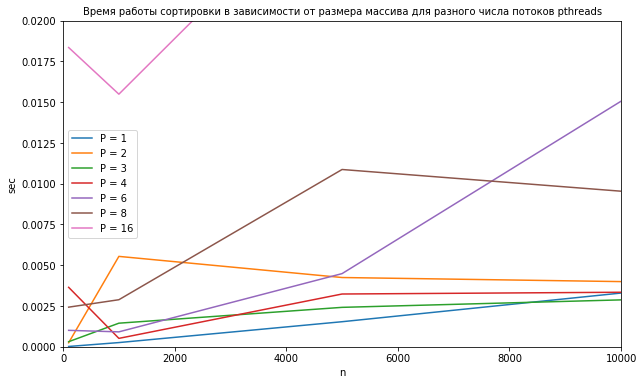

In [4]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.plot(N_values, T[P_values.index(P)], label="P = {}".format(P))
plt.title(u"Время работы сортировки в зависимости от размера массива для разного числа потоков pthreads", fontsize=10)
plt.ylabel("sec")
plt.xlabel("n")
plt.xlim(0, 10000)
plt.ylim(0, 0.02)
plt.legend()
plt.show()

*Примечание.* Для малых массивов побеждает обычная qsort, что связано с затратами на создание потоков.

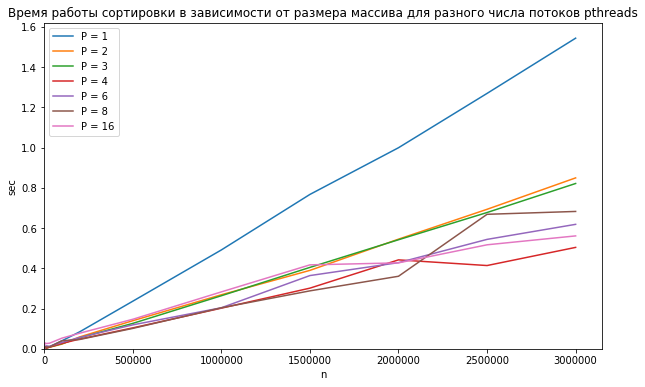

In [5]:
plt.figure(figsize=(10, 6))
for P in P_values:
    plt.plot(N_values, T[P_values.index(P)], label="P = {}".format(P))
plt.title(u"Время работы сортировки в зависимости от размера массива для разного числа потоков pthreads", fontsize=12)
plt.ylabel("sec")
plt.xlabel("n")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

*Примечание.* На больших данных уже ощущается выигрыш, который дает использование многих ядер процессора.

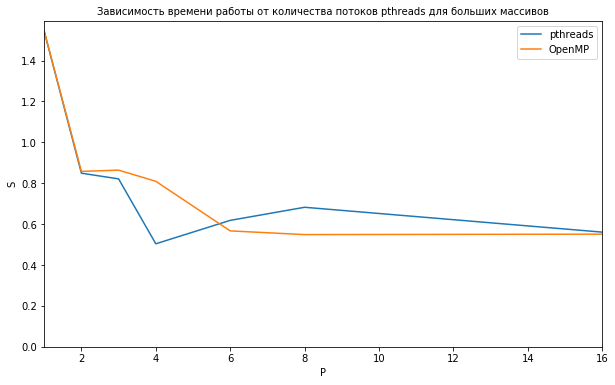

In [6]:
N = N_values[-1]
T1 = np.array([T[i][N_values.index(N)] for i in range(len(P_values))])
T1mp = np.array([Tmp[i][N_values.index(N)] for i in range(len(P_values))])
plt.figure(figsize=(10, 6))
plt.plot(P_values, T1, label="pthreads")
plt.plot(P_values, T1mp, label="OpenMP")
plt.plot
plt.title(u"Зависимость времени работы от количества потоков pthreads для больших массивов", fontsize=10)
plt.ylabel("S")
plt.xlabel("P")
plt.xlim(1, P_values[-1])
plt.ylim(0)
plt.legend()
plt.show()

*Примечание.* Как мы видим, реализации сортировки с использованием pthreads и OpenMP сравнимы по времени работы.

Исследуем зависимоcти величин ускорения $S(P) = \frac{T(1)}{T(P)}$ и эффективности $E(P) = \frac{S(P)}{P}$ при фиксированном $n$.

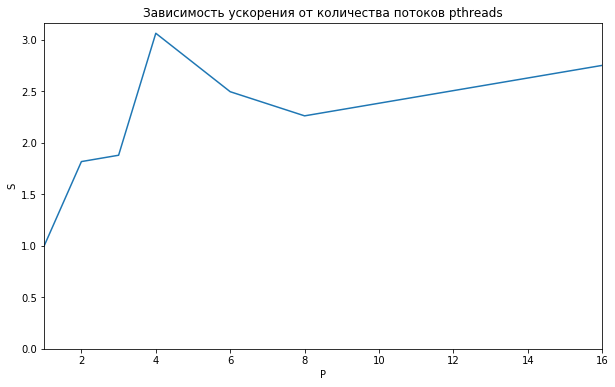

In [7]:
N = N_values[-1]
S = T[0][N_values.index(N)] / np.array([T[i][N_values.index(N)] for i in range(len(P_values))])
plt.figure(figsize=(10, 6))
plt.plot(P_values, S)
plt.title(u"Зависимость ускорения от количества потоков pthreads", fontsize=12)
plt.ylabel("S")
plt.xlabel("P")
plt.xlim(1, P_values[-1])
plt.ylim(0)
plt.show()

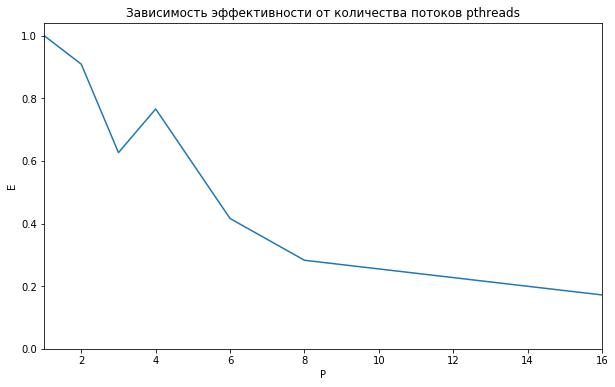

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(P_values, S / np.array(P_values))
plt.title(u"Зависимость эффективности от количества потоков pthreads", fontsize=12)
plt.xlabel("P")
plt.ylabel("E")
plt.xlim(1, P_values[-1])
plt.ylim(0)
plt.show()

*Вывод.* У нас получилось обогнать qsort из стандартной библиотеки.